In [58]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from numpy import *

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from linearmodels.iv import IV2SLS
from scipy import stats
from scipy.stats import trim_mean #trimmed mean
from scipy.stats import * #chi2_contingency로 카이제곱통계량계산
from scipy.stats import norm

import keyword
import random

#open api 불러올 때 필요한 것
from urllib.request import urlopen #request package 설치
from bs4 import BeautifulSoup #bs4 package 설치

# 그래프에서 한글 깨지지 않기 위헤 사용함
from matplotlib import rcParams
from matplotlib import font_manager,rc

rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

import FinanceDataReader as fdr
import plotly.graph_objects as go
import plotly.subplots as ms
import math



# LN10 : 회귀분석(1)
 
## 4 30대 1인가구의 소득과 자산 간 회귀 분석 이어서




In [59]:
df=pd.read_csv('c:/temp/household_2020a_1_30.csv')
df.head()

,Unnamed: 0,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,19,2020,G1,10001102,1,35,1,5,1,5252,0,1089,1033,L,5,2
1,134,2020,G2,11800271,2,30,1,6,1,17920,5000,3756,3032,O,4,2
2,157,2020,G1,12000102,1,30,1,6,1,540,0,2004,1812,G,5,3
3,190,2020,G1,12600311,1,36,1,6,1,1500,6280,5802,3959,C,2,3
4,191,2020,G1,12600321,2,31,1,6,1,1610,0,3032,1197,J,2,5


In [60]:
df1=df[['income_d','asset']]
df1['income']=df1['income_d']/10000
df1['net_asset']=df1['asset']/10000
df1.head()

,income_d,asset,income,net_asset
0,1033,5252,0.1033,0.5252
1,3032,17920,0.3032,1.7920
2,1812,540,0.1812,0.0540
3,3959,1500,0.3959,0.1500
4,1197,1610,0.1197,0.1610


In [61]:
asset_model=ols('net_asset ~ income',data=df1).fit()
print(asset_model.summary())

                            OLS Regression Results                            
Dep. Variable:              net_asset   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     60.16
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           7.87e-14
Time:                        22:03:47   Log-Likelihood:                -718.77
No. Observations:                 388   AIC:                             1442.
Df Residuals:                     386   BIC:                             1449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5051      0.145      3.494      0.0

In [62]:
# 설명 필기 추가

In [63]:
# intercept: alpha hat, 

In [64]:
# 소득이 0.5억원인 가구의 자산이 2억 이상일 확률
# 저번엔 손으로 계산, 이번엔 파이썬으로 계산
# 1단계) 평균을 계산한다
# params[0]: 위에 분석 결과에서 parameter 값 중에 0번째 값(intercept coef) 가져온다 
intercept=asset_model.params[0] # alpha hat
slope=asset_model.params[1] # beta hat'
mean=intercept+slope*0.5
mean

2.1074002820860476

In [65]:
# 해석
# mean =2.1... : 소득이 5000만원인 사람은 평균 자산이 2.1억이다

In [66]:
# 구하고 싶은 것: 소득이 0.5억원인 가구의 자산이 2억 이상일 확률
# 그러려면 z 값 필요함
# 그러려면 se 있어야하니까 rmse 알아야함
#rmse계산
rmse=np.sqrt(asset_model.mse_resid)
rmse

1.5467233297058174

In [67]:
# 이러케 하거나, 아님 지난 시간처럼 직접 계산해서 하던지 똑같음

In [68]:
z=(2-mean)/rmse # (2억-평균)/표준오차
print(z)

-0.06943729367971375


In [69]:
# 필기추가 18:13

In [70]:
1-norm.cdf(z)

0.5276792277600699

In [71]:
# 소득이 0.5억원인 가구의 자산이 2억 이상일 확률이 52.7% 이다

In [72]:
# 19:39 모징?

## 4 아파트 연령과 평당가격과의 회귀관계
- 니가 해보셈
- 필기추가 20:18
- y: 아파트 평당가격 , x: 아파트 연령

In [73]:
df=pd.read_csv('c:/temp/gangnam_20240510.csv')
df.head()

,Unnamed: 0,year,ymonth,price,built_yr,dong_name,apt_name,size,gu_code
0,0,2023,202303,"170,000",2006,역삼동,역삼푸르지오,59.8848,11680
1,1,2023,202303,"175,500",2006,역삼동,역삼푸르지오,59.8848,11680
2,2,2023,202303,"205,000",2006,역삼동,역삼푸르지오,84.9097,11680
3,3,2023,202303,"330,000",2001,역삼동,현대까르띠에710,171.9440,11680
4,4,2023,202303,"224,000",2006,역삼동,역삼푸르지오,84.9097,11680


In [74]:
# year-built_yr: 아파트 연령
# (price/size)/3.3 : 아파트 평당 가격
# 이걸로 회귀분석 하면됨

In [75]:
df1=df[['year','price','built_yr','size']]
df1.head()

,year,price,built_yr,size
0,2023,"170,000",2006,59.8848
1,2023,"175,500",2006,59.8848
2,2023,"205,000",2006,84.9097
3,2023,"330,000",2001,171.9440
4,2023,"224,000",2006,84.9097


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      2382 non-null   int64  
 1   price     2382 non-null   object 
 2   built_yr  2382 non-null   int64  
 3   size      2382 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 74.6+ KB


In [77]:
df1['age']=df1['year']-df1['built_yr']
df1.head()

,year,price,built_yr,size,age
0,2023,"170,000",2006,59.8848,17
1,2023,"175,500",2006,59.8848,17
2,2023,"205,000",2006,84.9097,17
3,2023,"330,000",2001,171.9440,22
4,2023,"224,000",2006,84.9097,17


In [78]:
df1['price'] = df['price'].str.replace(',', '').astype(int64)
df1.head()

,year,price,built_yr,size,age
0,2023,170000,2006,59.8848,17
1,2023,175500,2006,59.8848,17
2,2023,205000,2006,84.9097,17
3,2023,330000,2001,171.9440,22
4,2023,224000,2006,84.9097,17


In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      2382 non-null   int64  
 1   price     2382 non-null   int64  
 2   built_yr  2382 non-null   int64  
 3   size      2382 non-null   float64
 4   age       2382 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 93.2 KB


In [80]:
df1['per_size']=(df1['price']/df1['size'])/3.3
df1.head()

,year,price,built_yr,size,age,per_size
0,2023,170000,2006,59.8848,17,860.237515
1,2023,175500,2006,59.8848,17,888.068728
2,2023,205000,2006,84.9097,17,731.615023
3,2023,330000,2001,171.9440,22,581.584702
4,2023,224000,2006,84.9097,17,799.423245


In [81]:
# X: age, Y: per_size
apt_model=ols('per_size~age',data=df1).fit()
print(apt_model.summary())

                            OLS Regression Results                            
Dep. Variable:               per_size   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.721
Date:                Mon, 10 Jun 2024   Prob (F-statistic):             0.0539
Time:                        22:03:48   Log-Likelihood:                -16265.
No. Observations:                2382   AIC:                         3.253e+04
Df Residuals:                    2380   BIC:                         3.255e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    760.0655      9.635     78.882      0.0

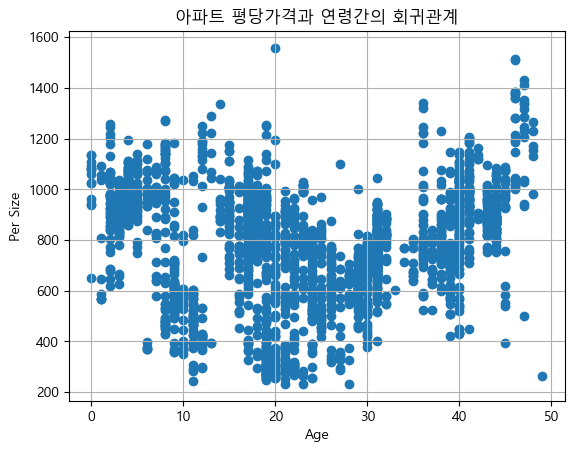

In [82]:
# 산포도 그리기: plt.scatter이용
plt.scatter(x=df1['age'],y=df1['per_size'])
plt.xlabel('Age')
plt.ylabel('Per Size')
plt.title('아파트 평당가격과 연령간의 회귀관계')
plt.grid()
plt.show()

위에까지 part 1

In [83]:
# Q: 회귀식을 이용하여 20년된 아파트의 평당가격이 1억원 이상인 아파트는 몇 %?

In [84]:
print(apt_model.summary())

                            OLS Regression Results                            
Dep. Variable:               per_size   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.721
Date:                Mon, 10 Jun 2024   Prob (F-statistic):             0.0539
Time:                        22:03:48   Log-Likelihood:                -16265.
No. Observations:                2382   AIC:                         3.253e+04
Df Residuals:                    2380   BIC:                         3.255e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    760.0655      9.635     78.882      0.0

In [85]:
# 직접 계산해보기

In [86]:
# 연령이 20년인 이파트의 평당가격의 평균은?
760+0.7002*20

774.004

In [87]:
#7740만원

In [88]:
# 그중에 평당가격이 1억원 이상인 아파트는?

In [89]:
# 회귀직선의 표준편차 = RMSE = sqrt(1-상관계수**2)*(standard deviation y)

In [90]:
# 상관계수 r
df1[['age','per_size']].corr()

,age,per_size
age,1.000000,0.039509
per_size,0.039509,1.000000


In [91]:
# RMSE
np.sqrt(1-0.039**2)*np.std(df1['per_size'])

223.53432335671198

In [92]:
# 표준화 
z=(1000-774.06)/223.53
z

1.0107815505748672

In [93]:
# Pr(z>-3.46) 일 확률?
p_value=1-norm.cdf(z)
print(p_value)

0.15606049761579577


In [94]:
# 0.0 = 아파트가 20년 된 거의 평균 펴당가격은 774만원이지만, 그 중에 평당가격이 1억 이상일 확률은 0퍼

In [95]:
# 파이썬으로 해보기

In [96]:
# age가 20년인 아파트의 평당 가격이 1억원 이상일 확률
# 1단계) 평균을 계산한다
# params[0]: 위에 분석 결과에서 parameter 값 중에 0번째 값(intercept coef) 가져온다 
intercept=apt_model.params[0] # alpha hat
slope=apt_model.params[1] # beta hat'
mean=intercept+slope*20
mean

774.0685962819862

In [97]:
# 구하고 싶은 것: 20년된 아파트의 평당가격이 1억 이상일 확률
# 그러려면 z 값 필요함
# 그러려면 se 있어야하니까 rmse 알아야함
#rmse계산
rmse=np.sqrt(apt_model.mse_resid)
rmse

223.62375300113368

In [98]:
z=(1000-mean)/rmse # (1억-평균)/표준오차
print(z)

1.010319345265923


In [99]:
1-norm.cdf(z)

0.15617115784924895

In [100]:
# 20년된 아파트의 평당 가격이 1억 이상일 확률이 15.6% 이다